# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [2]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [5]:
# Code

In [6]:

# Determine unique countries in the dataset
countries = df['country'].unique()
total_unique_countries = len(countries)

# Create a DataFrame for output data
countries_df = pd.DataFrame({'Country': countries})

# Display the total unique countries
print("Total unique countries:", total_unique_countries)


print("Output data:")
print(countries_df)


Total unique countries: 219
Output data:
                       Country
0                  Afghanistan
1                      Albania
2                      Algeria
3               American Samoa
4                      Andorra
..                         ...
214  Wallis and Futuna Islands
215   West Bank and Gaza Strip
216                      Yemen
217                     Zambia
218                   Zimbabwe

[219 rows x 1 columns]


In [7]:
# Determin the time span of the dataset

# Extract years data
years = [x for x in df['year']]

# Display the first 5 rows of the years data
print("First 5 years in the dataset:", years[:5])

# Display the time span of the data
print("Time span of the data varies from year", min(years), "to year", max(years))


First 5 years in the dataset: [1980, 1981, 1982, 1983, 1984]
Time span of the data varies from year 1980 to year 2013


In [8]:
# Checking if there is data present in countries for every year
complete_countries = df.groupby('country')['year'].nunique().eq(df['year'].nunique())
complete_countries_top5 = complete_countries[complete_countries].head(5)

print("Top 5 countries with data for each year:")
print(complete_countries_top5)


Top 5 countries with data for each year:
country
Afghanistan       True
Albania           True
Algeria           True
American Samoa    True
Andorra           True
Name: year, dtype: bool


In [9]:
# Here we have to find the missing data of country for some years
country_years = df.groupby('country')['year'].nunique()
missing_countries = country_years[country_years < df['year'].nunique()].index.tolist()

print("Countries with missing data for some years:")
for country in missing_countries[:-1]:
    print(country)


Countries with missing data for some years:
Bonaire, Saint Eustatius and Saba
Curacao
Montenegro
Netherlands Antilles
Serbia
Serbia & Montenegro
Sint Maarten (Dutch part)
South Sudan


In [10]:
# Determine rows with at least one non-null value across columns 3 to 57
non_null_rows = df.iloc[:, 3:58].notnull().any(axis=1)

# Filter the DataFrame to include only rows with at least one non-null value
non_null_data = df[non_null_rows]


print("Total rows with at least one non-null value across columns 3 to 57:", non_null_data.shape[0])

# Display the non null data
print("Non-null data across columns 3 to 57:")
print(non_null_data)


Total rows with at least one non-null value across columns 3 to 57: 3484
Non-null data across columns 3 to 57:
          country  year  new_sp_m014  new_sp_m1524  new_sp_m2534  \
17    Afghanistan  1997          0.0          10.0           6.0   
18    Afghanistan  1998         30.0         129.0         128.0   
19    Afghanistan  1999          8.0          55.0          55.0   
20    Afghanistan  2000         52.0         228.0         183.0   
21    Afghanistan  2001        129.0         379.0         349.0   
...           ...   ...          ...           ...           ...   
7235     Zimbabwe  2009        125.0         578.0           NaN   
7236     Zimbabwe  2010        150.0         710.0        2208.0   
7237     Zimbabwe  2011        152.0         784.0        2467.0   
7238     Zimbabwe  2012        120.0         783.0        2421.0   
7239     Zimbabwe  2013          NaN           NaN           NaN   

      new_sp_m3544  new_sp_m4554  new_sp_m5564  new_sp_m65  new_sp_f014 

## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [ ]:
# Code

In [11]:
# Determine the countries with different names in the dataset
countries = df['country'].unique()

In [12]:
# Melt the dataframe to ge the desired one
df_long = df.melt(id_vars=['country', 'year'], 
                  var_name='diagnosis',
                  value_name='cases')

In [13]:
for country in countries:
    print("Country:", country)

    # Melt dataframe to long format
    df_long = df[df['country'] == country].melt(id_vars=['country', 'year'], 
                                                var_name='diagnosis',
                                                value_name='cases')

    # Define mapping for diagnosis method
    diag_map = {'new_sp_m014': 'Pulmonary Smear (+): 0-14 Male',
               'new_sp_m1524': 'Pulmonary Smear (+): 15-24 Male',
               'new_sp_m2534': 'Pulmonary Smear (+): 25-34 Male',
               'new_sp_m3544': 'Pulmonary Smear (+): 35-44 Male',
               'new_sp_m4554': 'Pulmonary Smear (+): 45-54 Male',
               'new_sp_m5564': 'Pulmonary Smear (+): 55-64 Male',
               'new_sp_m65': 'Pulmonary Smear (+): 65+ Male',
               'new_sp_f014': 'Pulmonary Smear (+): 0-14 Female',
               'new_sp_f1524': 'Pulmonary Smear (+): 15-24 Female',
               'new_sp_f2534': 'Pulmonary Smear (+): 25-34 Female',
               'new_sp_f3544': 'Pulmonary Smear (+): 35-44 Female',
               'new_sp_f4554': 'Pulmonary Smear (+): 45-54 Female',
               'new_sp_f5564': 'Pulmonary Smear (+): 55-64 Female',
               'new_sp_f65': 'Pulmonary Smear (+): 65+ Female',
               'new_sn_m014': 'Pulmonary Smear (-): 0-14 Male',
               'new_sn_m1524': 'Pulmonary Smear (-): 15-24 Male',
               'new_sn_m2534': 'Pulmonary Smear (-): 25-34 Male',
               'new_sn_m3544': 'Pulmonary Smear (-): 35-44 Male',
               'new_sn_m4554': 'Pulmonary Smear (-): 45-54 Male',
               'new_sn_m5564': 'Pulmonary Smear (-): 55-64 Male',
               'new_sn_m65': 'Pulmonary Smear (-): 65+ Male',
               'new_sn_f014': 'Pulmonary Smear (-): 0-14 Female',
               'new_sn_f1524': 'Pulmonary Smear (-): 15-24 Female',
               'new_sn_f2534': 'Pulmonary Smear (-): 25-34 Female',
               'new_sn_f3544': 'Pulmonary Smear (-): 35-44 Female',
               'new_sn_f4554': 'Pulmonary Smear (-): 45-54 Female',
               'new_sn_f5564': 'Pulmonary Smear (-): 55-64 Female',
               'new_sn_f65': 'Pulmonary Smear (-): 65+ Female',
               'new_ep_m014': 'Extrapulmonary: 0-14 Male',
               'new_ep_m1524': 'Extrapulmonary: 15-24 Male',
               'new_ep_m2534': 'Extrapulmonary: 25-34 Male',
               'new_ep_m3544': 'Extrapulmonary: 35-44 Male',
               'new_ep_m4554': 'Extrapulmonary: 45-54 Male',
               'new_ep_m5564': 'Extrapulmonary: 55-64 Male',
               'new_ep_m65': 'Extrapulmonary: 65+ Male',
               'new_ep_f014': 'Extrapulmonary: 0-14 Female',
               'new_ep_f1524': 'Extrapulmonary: 15-24 Female',
               'new_ep_f2534': 'Extrapulmonary: 25-34 Female',
               'new_ep_f3544': 'Extrapulmonary: 35-44 Female',
               'new_ep_f4554': 'Extrapulmonary: 45-54 Female',
               'new_ep_f5564': 'Extrapulmonary: 55-64 Female',
               'new_ep_f65': 'Extrapulmonary: 65+ Female',
               'newrel_m014': 'Relapse: 0-14 Male',
               'newrel_m1524': 'Relapse: 15-24 Male',
               'newrel_m2534': 'Relapse: 25-34 Male',
               'newrel_m3544': 'Relapse: 35-44 Male',
               'newrel_m4554': 'Relapse: 45-54 Male',
               'newrel_m5564': 'Relapse: 55-64 Male',
               'newrel_m65': 'Relapse: 65+ Male',
               'newrel_f014': 'Relapse: 0-14 Female', 
               'newrel_f1524': 'Relapse: 15-24 Female',
               'newrel_f2534': 'Relapse: 25-34 Female',
               'newrel_f3544': 'Relapse: 35-44 Female',
               'newrel_f4554': 'Relapse: 45-54 Female',
               'newrel_f5564': 'Relapse: 55-64 Female',
               'newrel_f65': 'Relapse: 65+ Female'}

    # Map diagnosis codes  
    df_long['diagnosis'] = df_long['diagnosis'].replace(diag_map)
     
    # Split 'diagnosis' column into 'gender' and 'age'    
    df_long[['diagnosis', 'gender']] = df_long['diagnosis'].str.split(': ', expand=True)
    df_long[['age', '_']] = df_long['gender'].str.split(' ', expand=True)
    
    df_long = df_long.drop(columns='_')
    
    # Rename 'cases' column to 'number_of_cases'
    df_long = df_long.rename(columns={'cases': 'number_of_cases'})

    # Display the long format DataFrame for the current country
    print("Long format DataFrame for", country)
    print(df_long)
    print("\n")


Country: Afghanistan
Long format DataFrame for Afghanistan
          country  year            diagnosis  number_of_cases      gender  \
0     Afghanistan  1980  Pulmonary Smear (+)              NaN   0-14 Male   
1     Afghanistan  1981  Pulmonary Smear (+)              NaN   0-14 Male   
2     Afghanistan  1982  Pulmonary Smear (+)              NaN   0-14 Male   
3     Afghanistan  1983  Pulmonary Smear (+)              NaN   0-14 Male   
4     Afghanistan  1984  Pulmonary Smear (+)              NaN   0-14 Male   
...           ...   ...                  ...              ...         ...   
1899  Afghanistan  2009              Relapse              NaN  65+ Female   
1900  Afghanistan  2010              Relapse              NaN  65+ Female   
1901  Afghanistan  2011              Relapse              NaN  65+ Female   
1902  Afghanistan  2012              Relapse              NaN  65+ Female   
1903  Afghanistan  2013              Relapse              NaN  65+ Female   

       age  
0  

Long format DataFrame for Aruba
     country  year            diagnosis  number_of_cases      gender   age
0      Aruba  1980  Pulmonary Smear (+)              NaN   0-14 Male  0-14
1      Aruba  1981  Pulmonary Smear (+)              NaN   0-14 Male  0-14
2      Aruba  1982  Pulmonary Smear (+)              NaN   0-14 Male  0-14
3      Aruba  1983  Pulmonary Smear (+)              NaN   0-14 Male  0-14
4      Aruba  1984  Pulmonary Smear (+)              NaN   0-14 Male  0-14
...      ...   ...                  ...              ...         ...   ...
1899   Aruba  2009              Relapse              NaN  65+ Female   65+
1900   Aruba  2010              Relapse              NaN  65+ Female   65+
1901   Aruba  2011              Relapse              NaN  65+ Female   65+
1902   Aruba  2012              Relapse              NaN  65+ Female   65+
1903   Aruba  2013              Relapse              2.0  65+ Female   65+

[1904 rows x 6 columns]


Country: Australia
Long format DataFrame 

Long format DataFrame for Bolivia (Plurinational State of)
                               country  year            diagnosis  \
0     Bolivia (Plurinational State of)  1980  Pulmonary Smear (+)   
1     Bolivia (Plurinational State of)  1981  Pulmonary Smear (+)   
2     Bolivia (Plurinational State of)  1982  Pulmonary Smear (+)   
3     Bolivia (Plurinational State of)  1983  Pulmonary Smear (+)   
4     Bolivia (Plurinational State of)  1984  Pulmonary Smear (+)   
...                                ...   ...                  ...   
1899  Bolivia (Plurinational State of)  2009              Relapse   
1900  Bolivia (Plurinational State of)  2010              Relapse   
1901  Bolivia (Plurinational State of)  2011              Relapse   
1902  Bolivia (Plurinational State of)  2012              Relapse   
1903  Bolivia (Plurinational State of)  2013              Relapse   

      number_of_cases      gender   age  
0                 NaN   0-14 Male  0-14  
1                 NaN   0-14

Long format DataFrame for Bulgaria
       country  year            diagnosis  number_of_cases      gender   age
0     Bulgaria  1980  Pulmonary Smear (+)              NaN   0-14 Male  0-14
1     Bulgaria  1981  Pulmonary Smear (+)              NaN   0-14 Male  0-14
2     Bulgaria  1982  Pulmonary Smear (+)              NaN   0-14 Male  0-14
3     Bulgaria  1983  Pulmonary Smear (+)              NaN   0-14 Male  0-14
4     Bulgaria  1984  Pulmonary Smear (+)              NaN   0-14 Male  0-14
...        ...   ...                  ...              ...         ...   ...
1899  Bulgaria  2009              Relapse              NaN  65+ Female   65+
1900  Bulgaria  2010              Relapse              NaN  65+ Female   65+
1901  Bulgaria  2011              Relapse              NaN  65+ Female   65+
1902  Bulgaria  2012              Relapse              NaN  65+ Female   65+
1903  Bulgaria  2013              Relapse            137.0  65+ Female   65+

[1904 rows x 6 columns]


Country: Burki

Long format DataFrame for China, Macao SAR
               country  year            diagnosis  number_of_cases  \
0     China, Macao SAR  1980  Pulmonary Smear (+)              NaN   
1     China, Macao SAR  1981  Pulmonary Smear (+)              NaN   
2     China, Macao SAR  1982  Pulmonary Smear (+)              NaN   
3     China, Macao SAR  1983  Pulmonary Smear (+)              NaN   
4     China, Macao SAR  1984  Pulmonary Smear (+)              NaN   
...                ...   ...                  ...              ...   
1899  China, Macao SAR  2009              Relapse              NaN   
1900  China, Macao SAR  2010              Relapse              NaN   
1901  China, Macao SAR  2011              Relapse              NaN   
1902  China, Macao SAR  2012              Relapse              NaN   
1903  China, Macao SAR  2013              Relapse             15.0   

          gender   age  
0      0-14 Male  0-14  
1      0-14 Male  0-14  
2      0-14 Male  0-14  
3      0-14 Male

Long format DataFrame for Denmark
      country  year            diagnosis  number_of_cases      gender   age
0     Denmark  1980  Pulmonary Smear (+)              NaN   0-14 Male  0-14
1     Denmark  1981  Pulmonary Smear (+)              NaN   0-14 Male  0-14
2     Denmark  1982  Pulmonary Smear (+)              NaN   0-14 Male  0-14
3     Denmark  1983  Pulmonary Smear (+)              NaN   0-14 Male  0-14
4     Denmark  1984  Pulmonary Smear (+)              NaN   0-14 Male  0-14
...       ...   ...                  ...              ...         ...   ...
1899  Denmark  2009              Relapse              NaN  65+ Female   65+
1900  Denmark  2010              Relapse              NaN  65+ Female   65+
1901  Denmark  2011              Relapse              NaN  65+ Female   65+
1902  Denmark  2012              Relapse              NaN  65+ Female   65+
1903  Denmark  2013              Relapse              6.0  65+ Female   65+

[1904 rows x 6 columns]


Country: Djibouti
Long form

Long format DataFrame for French Polynesia
               country  year            diagnosis  number_of_cases  \
0     French Polynesia  1980  Pulmonary Smear (+)              NaN   
1     French Polynesia  1981  Pulmonary Smear (+)              NaN   
2     French Polynesia  1982  Pulmonary Smear (+)              NaN   
3     French Polynesia  1983  Pulmonary Smear (+)              NaN   
4     French Polynesia  1984  Pulmonary Smear (+)              NaN   
...                ...   ...                  ...              ...   
1899  French Polynesia  2009              Relapse              NaN   
1900  French Polynesia  2010              Relapse              NaN   
1901  French Polynesia  2011              Relapse              NaN   
1902  French Polynesia  2012              Relapse              NaN   
1903  French Polynesia  2013              Relapse              9.0   

          gender   age  
0      0-14 Male  0-14  
1      0-14 Male  0-14  
2      0-14 Male  0-14  
3      0-14 Male

Long format DataFrame for Haiti
     country  year            diagnosis  number_of_cases      gender   age
0      Haiti  1980  Pulmonary Smear (+)              NaN   0-14 Male  0-14
1      Haiti  1981  Pulmonary Smear (+)              NaN   0-14 Male  0-14
2      Haiti  1982  Pulmonary Smear (+)              NaN   0-14 Male  0-14
3      Haiti  1983  Pulmonary Smear (+)              NaN   0-14 Male  0-14
4      Haiti  1984  Pulmonary Smear (+)              NaN   0-14 Male  0-14
...      ...   ...                  ...              ...         ...   ...
1899   Haiti  2009              Relapse              NaN  65+ Female   65+
1900   Haiti  2010              Relapse              NaN  65+ Female   65+
1901   Haiti  2011              Relapse              NaN  65+ Female   65+
1902   Haiti  2012              Relapse              NaN  65+ Female   65+
1903   Haiti  2013              Relapse            339.0  65+ Female   65+

[1904 rows x 6 columns]


Country: Honduras
Long format DataFrame f

Long format DataFrame for Kazakhstan
         country  year            diagnosis  number_of_cases      gender   age
0     Kazakhstan  1980  Pulmonary Smear (+)              NaN   0-14 Male  0-14
1     Kazakhstan  1981  Pulmonary Smear (+)              NaN   0-14 Male  0-14
2     Kazakhstan  1982  Pulmonary Smear (+)              NaN   0-14 Male  0-14
3     Kazakhstan  1983  Pulmonary Smear (+)              NaN   0-14 Male  0-14
4     Kazakhstan  1984  Pulmonary Smear (+)              NaN   0-14 Male  0-14
...          ...   ...                  ...              ...         ...   ...
1899  Kazakhstan  2009              Relapse              NaN  65+ Female   65+
1900  Kazakhstan  2010              Relapse              NaN  65+ Female   65+
1901  Kazakhstan  2011              Relapse              NaN  65+ Female   65+
1902  Kazakhstan  2012              Relapse              NaN  65+ Female   65+
1903  Kazakhstan  2013              Relapse            594.0  65+ Female   65+

[1904 rows x 6

Long format DataFrame for Malawi
     country  year            diagnosis  number_of_cases      gender   age
0     Malawi  1980  Pulmonary Smear (+)              NaN   0-14 Male  0-14
1     Malawi  1981  Pulmonary Smear (+)              NaN   0-14 Male  0-14
2     Malawi  1982  Pulmonary Smear (+)              NaN   0-14 Male  0-14
3     Malawi  1983  Pulmonary Smear (+)              NaN   0-14 Male  0-14
4     Malawi  1984  Pulmonary Smear (+)              NaN   0-14 Male  0-14
...      ...   ...                  ...              ...         ...   ...
1899  Malawi  2009              Relapse              NaN  65+ Female   65+
1900  Malawi  2010              Relapse              NaN  65+ Female   65+
1901  Malawi  2011              Relapse              NaN  65+ Female   65+
1902  Malawi  2012              Relapse              NaN  65+ Female   65+
1903  Malawi  2013              Relapse            395.0  65+ Female   65+

[1904 rows x 6 columns]


Country: Malaysia
Long format DataFrame 

Long format DataFrame for Morocco
      country  year            diagnosis  number_of_cases      gender   age
0     Morocco  1980  Pulmonary Smear (+)              NaN   0-14 Male  0-14
1     Morocco  1981  Pulmonary Smear (+)              NaN   0-14 Male  0-14
2     Morocco  1982  Pulmonary Smear (+)              NaN   0-14 Male  0-14
3     Morocco  1983  Pulmonary Smear (+)              NaN   0-14 Male  0-14
4     Morocco  1984  Pulmonary Smear (+)              NaN   0-14 Male  0-14
...       ...   ...                  ...              ...         ...   ...
1899  Morocco  2009              Relapse              NaN  65+ Female   65+
1900  Morocco  2010              Relapse              NaN  65+ Female   65+
1901  Morocco  2011              Relapse              NaN  65+ Female   65+
1902  Morocco  2012              Relapse              NaN  65+ Female   65+
1903  Morocco  2013              Relapse            921.0  65+ Female   65+

[1904 rows x 6 columns]


Country: Mozambique
Long fo

Long format DataFrame for Northern Mariana Islands
                       country  year            diagnosis  number_of_cases  \
0     Northern Mariana Islands  1980  Pulmonary Smear (+)              NaN   
1     Northern Mariana Islands  1981  Pulmonary Smear (+)              NaN   
2     Northern Mariana Islands  1982  Pulmonary Smear (+)              NaN   
3     Northern Mariana Islands  1983  Pulmonary Smear (+)              NaN   
4     Northern Mariana Islands  1984  Pulmonary Smear (+)              NaN   
...                        ...   ...                  ...              ...   
1899  Northern Mariana Islands  2009              Relapse              NaN   
1900  Northern Mariana Islands  2010              Relapse              NaN   
1901  Northern Mariana Islands  2011              Relapse              NaN   
1902  Northern Mariana Islands  2012              Relapse              NaN   
1903  Northern Mariana Islands  2013              Relapse              1.0   

          ge

Long format DataFrame for Republic of Korea
                country  year            diagnosis  number_of_cases  \
0     Republic of Korea  1980  Pulmonary Smear (+)              NaN   
1     Republic of Korea  1981  Pulmonary Smear (+)              NaN   
2     Republic of Korea  1982  Pulmonary Smear (+)              NaN   
3     Republic of Korea  1983  Pulmonary Smear (+)              NaN   
4     Republic of Korea  1984  Pulmonary Smear (+)              NaN   
...                 ...   ...                  ...              ...   
1899  Republic of Korea  2009              Relapse              NaN   
1900  Republic of Korea  2010              Relapse              NaN   
1901  Republic of Korea  2011              Relapse              NaN   
1902  Republic of Korea  2012              Relapse              NaN   
1903  Republic of Korea  2013              Relapse           6649.0   

          gender   age  
0      0-14 Male  0-14  
1      0-14 Male  0-14  
2      0-14 Male  0-14  
3  

Long format DataFrame for Saint Vincent and the Grenadines
                               country  year            diagnosis  \
0     Saint Vincent and the Grenadines  1980  Pulmonary Smear (+)   
1     Saint Vincent and the Grenadines  1981  Pulmonary Smear (+)   
2     Saint Vincent and the Grenadines  1982  Pulmonary Smear (+)   
3     Saint Vincent and the Grenadines  1983  Pulmonary Smear (+)   
4     Saint Vincent and the Grenadines  1984  Pulmonary Smear (+)   
...                                ...   ...                  ...   
1899  Saint Vincent and the Grenadines  2009              Relapse   
1900  Saint Vincent and the Grenadines  2010              Relapse   
1901  Saint Vincent and the Grenadines  2011              Relapse   
1902  Saint Vincent and the Grenadines  2012              Relapse   
1903  Saint Vincent and the Grenadines  2013              Relapse   

      number_of_cases      gender   age  
0                 NaN   0-14 Male  0-14  
1                 NaN   0-14

Long format DataFrame for Somalia
      country  year            diagnosis  number_of_cases      gender   age
0     Somalia  1980  Pulmonary Smear (+)              NaN   0-14 Male  0-14
1     Somalia  1981  Pulmonary Smear (+)              NaN   0-14 Male  0-14
2     Somalia  1982  Pulmonary Smear (+)              NaN   0-14 Male  0-14
3     Somalia  1983  Pulmonary Smear (+)              NaN   0-14 Male  0-14
4     Somalia  1984  Pulmonary Smear (+)              NaN   0-14 Male  0-14
...       ...   ...                  ...              ...         ...   ...
1899  Somalia  2009              Relapse              NaN  65+ Female   65+
1900  Somalia  2010              Relapse              NaN  65+ Female   65+
1901  Somalia  2011              Relapse              NaN  65+ Female   65+
1902  Somalia  2012              Relapse              NaN  65+ Female   65+
1903  Somalia  2013              Relapse            189.0  65+ Female   65+

[1904 rows x 6 columns]


Country: South Africa
Long 

Long format DataFrame for Timor-Leste
         country  year            diagnosis  number_of_cases      gender   age
0    Timor-Leste  2002  Pulmonary Smear (+)             13.0   0-14 Male  0-14
1    Timor-Leste  2003  Pulmonary Smear (+)              5.0   0-14 Male  0-14
2    Timor-Leste  2004  Pulmonary Smear (+)              5.0   0-14 Male  0-14
3    Timor-Leste  2005  Pulmonary Smear (+)              8.0   0-14 Male  0-14
4    Timor-Leste  2006  Pulmonary Smear (+)              1.0   0-14 Male  0-14
..           ...   ...                  ...              ...         ...   ...
667  Timor-Leste  2009              Relapse              NaN  65+ Female   65+
668  Timor-Leste  2010              Relapse              NaN  65+ Female   65+
669  Timor-Leste  2011              Relapse              NaN  65+ Female   65+
670  Timor-Leste  2012              Relapse              NaN  65+ Female   65+
671  Timor-Leste  2013              Relapse              NaN  65+ Female   65+

[672 rows x 6

Long format DataFrame for United Republic of Tanzania
                          country  year            diagnosis  number_of_cases  \
0     United Republic of Tanzania  1980  Pulmonary Smear (+)              NaN   
1     United Republic of Tanzania  1981  Pulmonary Smear (+)              NaN   
2     United Republic of Tanzania  1982  Pulmonary Smear (+)              NaN   
3     United Republic of Tanzania  1983  Pulmonary Smear (+)              NaN   
4     United Republic of Tanzania  1984  Pulmonary Smear (+)              NaN   
...                           ...   ...                  ...              ...   
1899  United Republic of Tanzania  2009              Relapse              NaN   
1900  United Republic of Tanzania  2010              Relapse              NaN   
1901  United Republic of Tanzania  2011              Relapse              NaN   
1902  United Republic of Tanzania  2012              Relapse              NaN   
1903  United Republic of Tanzania  2013              Re

Long format DataFrame for Viet Nam
       country  year            diagnosis  number_of_cases      gender   age
0     Viet Nam  1980  Pulmonary Smear (+)              NaN   0-14 Male  0-14
1     Viet Nam  1981  Pulmonary Smear (+)              NaN   0-14 Male  0-14
2     Viet Nam  1982  Pulmonary Smear (+)              NaN   0-14 Male  0-14
3     Viet Nam  1983  Pulmonary Smear (+)              NaN   0-14 Male  0-14
4     Viet Nam  1984  Pulmonary Smear (+)              NaN   0-14 Male  0-14
...        ...   ...                  ...              ...         ...   ...
1899  Viet Nam  2009              Relapse              NaN  65+ Female   65+
1900  Viet Nam  2010              Relapse              NaN  65+ Female   65+
1901  Viet Nam  2011              Relapse              NaN  65+ Female   65+
1902  Viet Nam  2012              Relapse              NaN  65+ Female   65+
1903  Viet Nam  2013              Relapse           3110.0  65+ Female   65+

[1904 rows x 6 columns]


Country: Walli

## Question 3: Create a graph that shows when countries started to report TB cases.

In [ ]:
# Code

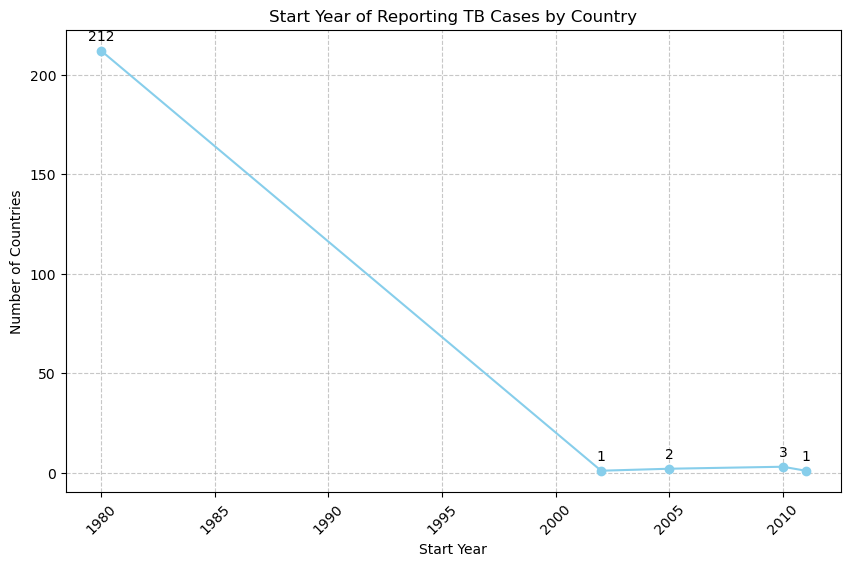

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with columns 'country' and 'year' indicating TB cases reported by country and year

# Group the data by country and count the number of reported cases for each year
country_year_count = df.groupby(['country', 'year']).size().unstack(fill_value=0)

# Determine when each country started to report TB cases
country_start_year = country_year_count.ne(0).idxmax(axis=1)

# Count the number of countries for each start year
start_year_count = country_start_year.value_counts().sort_index()

# Plot the start year for each country using a line plot
plt.figure(figsize=(10, 6))
start_year_count.plot(kind='line', color='skyblue', marker='o')
plt.title('Start Year of Reporting TB Cases by Country')
plt.xlabel('Start Year')
plt.ylabel('Number of Countries')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Annotate each data point with the corresponding count
for x, y in zip(start_year_count.index, start_year_count.values):
    plt.annotate(text=str(y), xy=(x, y), xytext=(x, y + 5), ha='center')

plt.show()


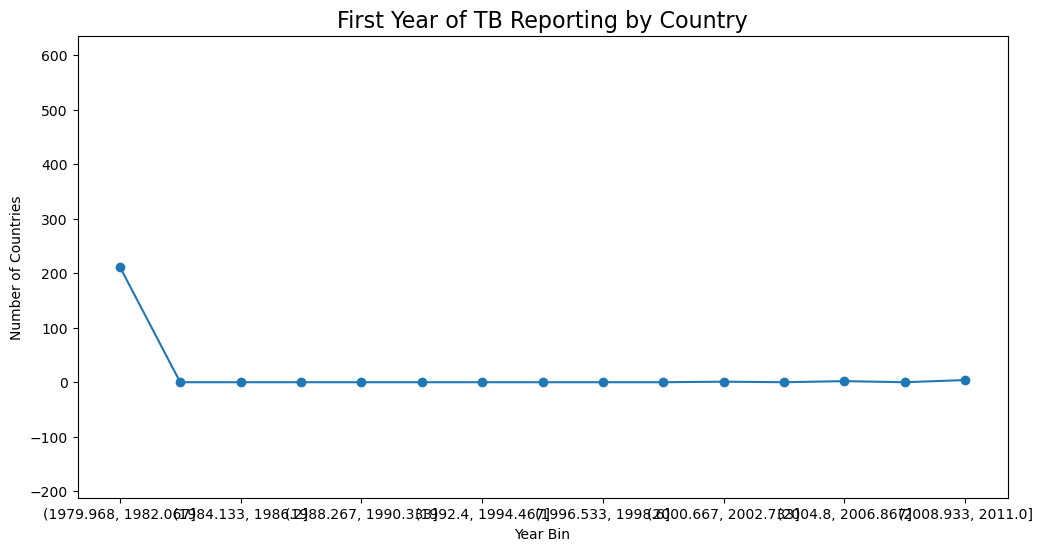

In [20]:
# Get first year per country
first_year = df.groupby('country')['year'].min() 

# Create 15 bins
bins = pd.cut(first_year, 15, retbins=True)[1] 

# Bin first years
first_year_binned = pd.cut(first_year, bins=bins, include_lowest=True)

# Count countries per bin
country_counts = first_year_binned.value_counts().sort_index()

# Plot line chart
plt.figure(figsize=(12,6))
country_counts.plot(kind='line', marker='o')

# Get data range
y_min = country_counts.min()
y_max = country_counts.max()
y_range = y_max - y_min

# Set y-axis limit to 3x data range
plt.ylim(y_min - y_range, y_max + 2*y_range)  

# Label plot
plt.title('First Year of TB Reporting by Country', size=16)
plt.xlabel('Year Bin')
plt.ylabel('Number of Countries')

plt.show()